<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Data Analytics 

### Bootstrap Hypothesis Testing in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


##  Bootstrap Hypothesis Testing Demonstration

We start with difference in means and then move to difference in variances. We answer the question:

* is the observed difference in the statistic between 2 sample sets significant? 

* should we infer that the 2 sample sets are from 2 populations with different population parameters?

* or could the observed difference be due to random effect.

We will use bootstrap methods to sample realizations given the specified null hypothesis, $H_0$ is true to build the sampling distribution. Then we look at the observed effect relative to this smapling distribution to assess significance.

* the tests we will demonstrated have analytical solutions and we will show that our bootstrap methods reproduce these analytically-known distributions while providing a more general workflow for any significance problem.

### Boostrap and Analytical Methods for Hypothesis Testing, Difference in Means

* we calculate the hypothesis test for different in means with boostrap and compare to the analytical expression

* **Welch's t-test**: we assume the features are Gaussian distributed and the variance are unequal

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

#### Hypothesis Testing

Powerful methodology for spatial data analytics:

1. extracted sample set 1 and 2, the means look different, but are they? 
2. should we suspect that the samples are in fact from 2 different populations?

Now, let's try the t-test, hypothesis test for difference in means.  This test assumes that the variances are similar along with the data being Gaussian distributed (see the course notes for more on this).  This is our test:

\begin{equation}
H_0: \mu_{X1} = \mu_{X2}
\end{equation}

\begin{equation}
H_1: \mu_{X1} \ne \mu_{X2}
\end{equation}

To test this we will calculate the t statistic with the bootstrap and analytical approaches.

#### The Welch's t-test for Difference in Means by Analytical Methods

We work with the following test statistic, *t statistic*, from the two sample sets.

\begin{equation}
\hat{t} = \frac{\overline{x}_1 - \overline{x}_2}{\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}
\end{equation}

where $\overline{x}_1$ and $\overline{x}_2$ are the sample means, $s^2_1$ and $s^2_2$ are the sample variances and $n_1$ and $n_2$ are the numer of samples from the two datasets.

The critical value, $t_{critical}$ is calculated by the analytical expression by:

\begin{equation}
t_{critical} = \left|t(\frac{\alpha}{2},\nu)\right|
\end{equation}

The degrees of freedom, $\nu$, is calculated as follows:

\begin{equation}
\nu = \frac{\left(\frac{1}{n_1} + \frac{\mu}{n_2}\right)^2}{\frac{1}{n_1^2(n_1-1)} + \frac{\mu^2}{n_2^2(n_2-1)}}
\end{equation}

Alternatively, the sampling distribution of the t_{statistic} and t_{critical} may be calculated empirically with bootstrap.

The workflow proceeds as:

* shift both sample sets to have the mean of the combined data, $x_1$ → $x^*_1$, $x_2$ → $x^*_2$ 

* for each bootstrap realization, $\ell=1\ldots,L$

    * perform $n_1$ Monte Carlo simulations, draws with replacement, from sample set $x^*_1$
    
    * perform $n_2$ Monte Carlo simulations, draws with replacement, from sample set $x^*_2$
    
    * calculate the t_{statistic} realization, $\hat{t}^{\ell}$ given the resulting sample means $\overline{x}^{*,\ell}_1$ and $\overline{x}^{*,\ell}_2$ and the sample variances $s^{*,2,\ell}_1$ and $s^{*,2,\ell}_2$
    
* pool the results to assemble the $t_{statistic}$ sampling distribution

* calculate the cumulative probability of the observed t_{statistic}m, $\hat{t}$, from the boostrap distribution based on $\hat{t}^{\ell}$, $\ell = 1,\ldots,L$.

Here's some prerequisite information on the boostrap.

#### Bootstrap

Uncertainty in the sample statistics
* one source of uncertainty is the paucity of data.
* do 200 or even less wells provide a precise (and accurate estimate) of the mean? standard deviation? skew? P13?

Would it be useful to know the uncertainty in these statistics due to limited sampling?
* what is the impact of uncertainty in the mean porosity e.g. 20%+/-2%?

**Bootstrap** is a method to assess the uncertainty in a sample statistic by repeated random sampling with replacement.

Assumptions
* sufficient, representative sampling, identical, idependent samples

Limitations
1. assumes the samples are representative 
2. assumes stationarity
3. only accounts for uncertainty due to too few samples, e.g. no uncertainty due to changes away from data
4. does not account for boundary of area of interest 
5. assumes the samples are independent
6. does not account for other local information sources

The Bootstrap Approach (Efron, 1982)

Statistical resampling procedure to calculate uncertainty in a calculated statistic from the data itself.
* Does this work?  Prove it to yourself, for uncertainty in the mean solution is standard error: 

\begin{equation}
\sigma^2_\overline{x} = \frac{\sigma^2_s}{n}
\end{equation}

Extremely powerful - could calculate uncertainty in any statistic!  e.g. P13, skew etc.
* Would not be possible access general uncertainty in any statistic without bootstrap.
* Advanced forms account for spatial information and sampling strategy (game theory and Journel’s spatial bootstrap (1993).

Steps: 

1. assemble a sample set, must be representative, reasonable to assume independence between samples

2. optional: build a cumulative distribution function (CDF)
    * may account for declustering weights, tail extrapolation
    * could use analogous data to support

3. For $\ell = 1, \ldots, L$ realizations, do the following:

    * For $i = \alpha, \ldots, n$ data, do the following:

        * Draw a random sample with replacement from the sample set or Monte Carlo simulate from the CDF (if available). 

6. Calculate a realization of the sammary statistic of interest from the $n$ samples, e.g. $m^\ell$, $\sigma^2_{\ell}$. Return to 3 for another realization.

7. Compile and summarize the $L$ realizations of the statistic of interest.

This is a very powerful method.  Let's try it out and compare the result to the analytical form of the confidence interval for the sample mean. 


#### Objective 

Provide an example and demonstration for:

1. interactive plotting in Jupyter Notebooks with Python packages matplotlib and ipywidgets
2. provide an intuitive hands-on example of confidence intervals and compare to statistical boostrap   

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

#### Load the Required Libraries

The following code loads the required libraries.

In [255]:
import os                                                 # set working directory, run executables
import matplotlib                                         # plotting
import matplotlib.pyplot as plt                           # plotting
import seaborn as sns                                     # plotting
import numpy as np                                        # working with arrays
import pandas as pd                                       # working with DataFrames
import statistics as stats                                # statistics like the mode
import random                                             # random drawing / bootstrap realizations of the data
from scipy.stats import t                                 # Student's t distribution for analytical solution
from scipy.stats import ttest_ind                         
from scipy.stats import f as F                            # Student's F distribution for analytical solution
from scipy.stats import percentileofscore                 # forward of CDF

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [166]:
os.chdir("c:/PGE383")                                     # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

In [167]:
df = pd.read_csv('sample_data_biased.csv')                # load our data table

Let's drop some samples so that we increase the variations in bootstrap samples for our demonstration below.

In [168]:
np.random.seed(seed = 73073)
df = df.sample(frac = 0.2)                                # extract 50 random samples to reduce the size of the dataset   
print('Using ' + str(len(df)) + ' number of samples')

Using 58 number of samples


Visualizing the DataFrame would be useful and we already learned about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by printing a slice or by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the slice we could look at any subset of the data table and with the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [169]:
df.head()                                                 # display first 4 samples in the table as a preview

,X,Y,Facies,Porosity,Perm
150,20,69,0,0.104484,3.003225
17,400,600,1,0.163054,317.883581
68,640,529,1,0.120547,10.801778
234,490,289,1,0.144525,16.251107
214,470,899,1,0.211944,1302.937858


#### Summary Statistics for Tabular Data

The table includes X and Y coordinates (meters), Facies 1 and 0 (1 is sandstone and 0 interbedded sand and mudstone), Porosity (fraction), and permeability as Perm (mDarcy). 

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [170]:
df.describe().transpose()                                 # data summary statistics

,count,mean,std,min,25%,50%,75%,max
X,58.0,418.275862,231.457153,10.000000,272.500000,400.000000,560.000000,990.000000
Y,58.0,493.224138,287.393614,39.000000,279.000000,499.500000,676.500000,989.000000
Facies,58.0,0.810345,0.395452,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,58.0,0.136501,0.040473,0.074349,0.105662,0.126192,0.147067,0.223661
Perm,58.0,270.961923,590.805185,0.093252,4.112400,15.105651,79.314434,2372.383732


#### Visualizing Tabular Data with Location Maps 

It is natural to set the x and y coordinate and feature ranges manually. e.g. do you want your color bar to go from 0.05887 to 0.24230 exactly? Also, let's pick a color map for display. I heard that plasma is known to be friendly to the color blind as the color and intensity vary together (hope I got that right, it was an interesting Twitter conversation started by Matt Hall from Agile if I recall correctly). We will assume a study area of 0 to 1,000m in x and y and omit any data outside this area.

In [171]:
xmin = 0.0; xmax = 1000.0                                 # range of x values
ymin = 0.0; ymax = 1000.0                                 # range of y values
pormin = 0.05; pormax = 0.25;                             # range of porosity values
permmin = 0.01; permmax = 10000                           # range of permeability values                          
cmap = plt.cm.plasma                                      # color map
cumul_prob = np.linspace(0.0,1.0,100)                     # list of cumulative probabilities

Let's try out location maps, histograms and scatter plots. 

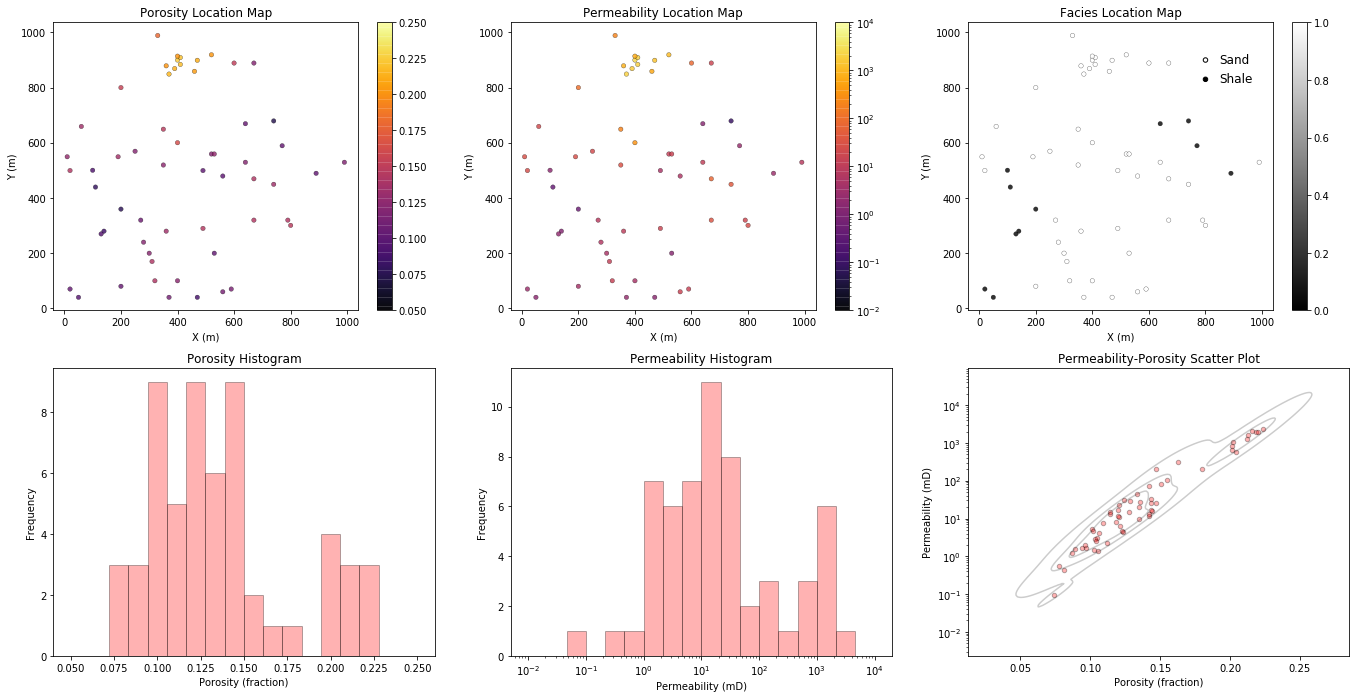

In [172]:
plt.subplot(231)                                          # location maps, histograms and scatter plots                                      
plt.scatter(df['X'],df['Y'],s = 20,c = df['Porosity'],cmap = plt.cm.inferno,linewidths = 0.3,edgecolor = 'black',alpha = 0.8,vmin = pormin,vmax = pormax)
plt.colorbar(); plt.xlabel('X (m)'); plt.ylabel('Y (m)'); plt.title('Porosity Location Map')

plt.subplot(232)
plt.scatter(df['X'],df['Y'],s = 20,c = df['Perm'],cmap = plt.cm.inferno,linewidths = 0.3,edgecolor = 'black',alpha = 0.8,vmin = permmin,vmax = permmax,norm=matplotlib.colors.LogNorm())
plt.colorbar(); plt.xlabel('X (m)'); plt.ylabel('Y (m)'); plt.title('Permeability Location Map')

plt.subplot(233)
plt.scatter(df['X'],df['Y'],s = 20,c = df['Facies'],cmap = plt.cm.gray,linewidths = 0.3,edgecolor = 'black',alpha = 0.8,vmin = 0.0,vmax = 1.0)
plt.scatter(x=[800,800],y=[900,830],c=[1,0],cmap = plt.cm.gray,s=20,edgecolor = 'black')
plt.text(850, 890, r'Sand', fontsize=12); plt.text(850, 820, r'Shale', fontsize=12)
plt.colorbar(); plt.xlabel('X (m)'); plt.ylabel('Y (m)'); plt.title('Facies Location Map')

plt.subplot(234)
plt.hist(df['Porosity'],color = 'red',alpha = 0.3,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)))
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram')

plt.subplot(235)
plt.hist(df['Perm'],color = 'red',alpha = 0.3,edgecolor='black',bins=np.logspace(np.log10(permmin),np.log10(permmax),int(len(df)/3)))
plt.xlabel('Permeability (mD)'); plt.ylabel('Frequency'); plt.title('Permeability Histogram'); plt.xscale('log')

plt.subplot(236)
plt.scatter(df['Porosity'],df['Perm'],s = 20,color = 'red',alpha = 0.3,edgecolor='black')
plt.ylabel('Permeability (mD)'); plt.xlabel('Porosity (fraction)'); plt.title('Permeability-Porosity Scatter Plot')
plt.yscale('log')
sns.kdeplot(x=df['Porosity'],y=df['Perm'],color = 'black',alpha = 0.2,levels = 4)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.2, wspace=0.2, hspace=0.2)
plt.show()

#### By-Facies Data Visualization

Let's check the statistics by-facies. First, let's break up the DataFrame, df, into separate DataFrames for each facies:

1. Sand (facies = 0)
2. Shale (facies = 1)

In [173]:
df_sand = df[df['Facies']==1]                             # extract sand and shale facies samples to a new DataFrame
df_shale = df[df['Facies']==0]                           

Now we can plot the distributions by facies.

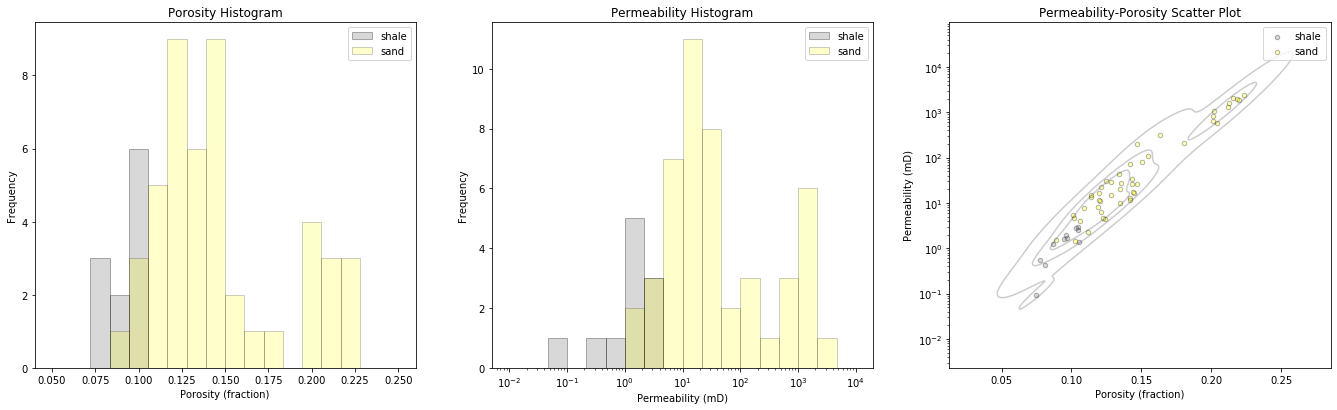

In [174]:
plt.subplot(131)
plt.hist(df_shale['Porosity'],color = 'gray',alpha = 0.3,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)),label='shale')
plt.hist(df_sand['Porosity'],color = 'yellow',alpha = 0.2,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)),label='sand')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram')
plt.legend()

plt.subplot(132)
plt.hist(df_shale['Perm'],color = 'gray',alpha = 0.3,edgecolor='black',bins=np.logspace(np.log10(permmin),np.log10(permmax),int(len(df)/3)),label='shale')
plt.hist(df_sand['Perm'],color = 'yellow',alpha = 0.2,edgecolor='black',bins=np.logspace(np.log10(permmin),np.log10(permmax),int(len(df)/3)),label='sand')
plt.legend()

plt.xlabel('Permeability (mD)'); plt.ylabel('Frequency'); plt.title('Permeability Histogram'); plt.xscale('log')

plt.subplot(133)
plt.scatter(df_shale['Porosity'],df_shale['Perm'],s = 20,color = 'gray',alpha = 0.3,edgecolor='black',label='shale')
plt.scatter(df_sand['Porosity'],df_sand['Perm'],s = 20,color = 'yellow',alpha = 0.3,edgecolor='black',label='sand')
plt.legend()

plt.ylabel('Permeability (mD)'); plt.xlabel('Porosity (fraction)'); plt.title('Permeability-Porosity Scatter Plot')
plt.yscale('log')
sns.kdeplot(x=df['Porosity'],y=df['Perm'],color = 'black',alpha = 0.2,levels = 4)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

### Bootstrap Hypothesis Test

#### Boostrap Student's t-test, Welch's Test Difference in Means

First let's calculate the t-statistic observed in our dataset, assuming unequal variances with the Welch's t-test.

* the observed effect, difference in means, $\overline{x}_1 - \overline{x}_2$, standardized by standard error, $\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}$ 

In [176]:
t_stat_obs, p_value_obs = ttest_ind(df_shale['Porosity'],df_sand['Porosity'],equal_var=False)
print("The observed Welch's t-statistic is " + str(round(t_stat_obs,2)))

The observed Welch's t-statistic is -8.17


Given our knowledge about the theory, the sampling distribution will be standard t-distributed,we already know that this effect will be significant!

To build the sampling distribution given the null hypothesis is correct, we need to modifed the data so that the null hypothesis is true.

* we shift both datasets to have the same mean.

The procedure to accomplish this is:

1. make a deep copy of the porosity values as a 1D ndarray from each sand and shale DataFrames. We do this to ensure we don't change the original DataFrame, i.e. a slice would be a shallow copy and the mean would be shifted for our original data set! 

2. calculate the common mean by pooling all of the data together

3. apply the affine correction to shift the mean, $X^{*} = X - \overline{X}
+ \overline{X}_{pooled}$ 

Let's make a plot to check the result.

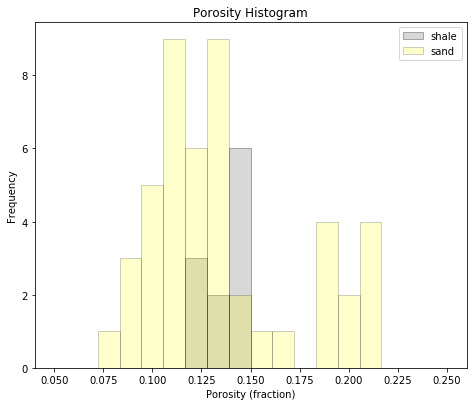

In [177]:
por_sand = df_sand.copy(deep = True)['Porosity'].values   # make a deepcopy of porosity by-facies
por_shale = df_shale.copy(deep = True)['Porosity'].values 

global_average = np.average(np.concatenate([por_sand,por_shale])) # shift the means to be equal to the globla mean
por_sand_s = por_sand - np.average(por_sand) + global_average
por_shale_s = por_shale - np.average(por_shale) + global_average

plt.subplot(111)                                          # plot the new shifted histograms
plt.hist(por_shale_s,color = 'gray',alpha = 0.3,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)),label='shale')
plt.hist(por_sand_s,color = 'yellow',alpha = 0.2,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)),label='sand')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram')
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

We now have two datasets for which the null hypothesis is true. 

\begin{equation} 
H_0: \mu_{\phi_{sand}} = \mu_{\phi_{shale}}
\end{equation}

We are saying, these two sample sets came from populations with the same means.

* hypothesis tests are inferential, they are related to the population.

Let's demonstrate the Welch's t-test, no assumption of equal population variances

* bootstrap provides a new realization of each sample set

* we calculate the realization of the t-statistic given the mean and standard deviation from the sample set realization 

\begin{equation}
\hat{t}^{\ell} = \frac{\overline{x^{\ell}}_1 - \overline{x^{\ell}}_2}{\sqrt{\frac{{s^2}^{\ell}_1}{n_1} + \frac{{s^2}^{\ell}_2}{n_2}}}
\end{equation}



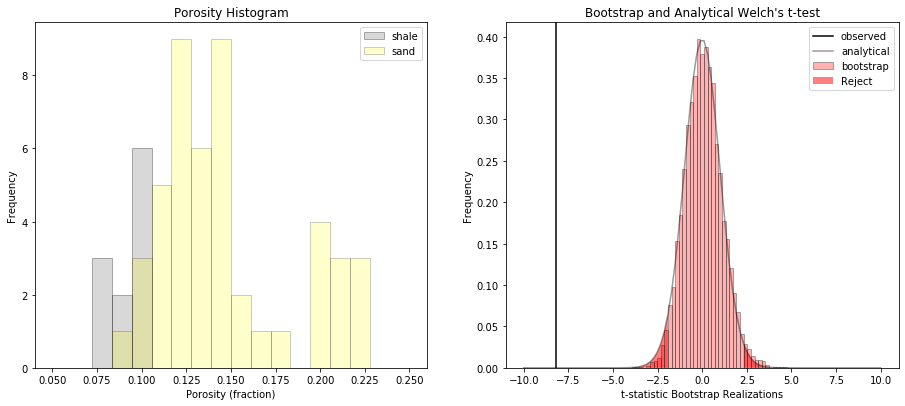

The p-value of the observed effect is 0.0


In [269]:
L = 10000                                                 # number of bootstrap realizations, $L$, to sample the t-statistic               
alpha = 0.05                                              # alpha level

t_stat = np.zeros(L); p_value = np.zeros(L)               # make arrays to store the t-statistic, and p-value realizations
  
u = stats.variance(por_sand)/stats.variance(por_shale)    # calculate the DOF for the Welch's t-test, a bit complicated
dof = ((1/len(por_shale)) + u/len(por_sand))**2/(1/(len(por_shale)**2*(len(por_shale)-1)) + u**2/(len(por_sand)**2*(len(por_sand)-1)) )
                                                       
for l in range(0, L):                                     # loop over bootstrap realizations
    por_shale_real = random.choices(por_shale_s, weights=None, cum_weights=None, k=len(por_shale_s)) # bootstrap realization of shale porosity
    por_sand_real = random.choices(por_sand_s, weights=None, cum_weights=None, k=len(por_sand_s)) # bootstrap realization of sand porosity
    t_stat[l], p_value[l] = ttest_ind(por_shale_real,por_sand_real,equal_var=False)

lower_bound = np.percentile(t_stat,alpha*0.5*100)
upper_bound = np.percentile(t_stat,(1-alpha*0.5)*100)

plt.subplot(121)                                          # original porosity histograms
plt.hist(df_shale['Porosity'],color = 'gray',alpha = 0.3,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)),label='shale')
plt.hist(df_sand['Porosity'],color = 'yellow',alpha = 0.2,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)),label='sand')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram')
plt.legend()

plt.subplot(122)                                          # bootstrap t-statistic distribution by bootstrap, analytical and observed t-statistic
plt.hist(t_stat,color = 'red',alpha = 0.3,edgecolor='black',bins=np.linspace(-10,10,100),density=True,label='bootstrap')
plt.axvline(x=t_stat_obs,c='black',label='observed')
plt.xlabel('t-statistic Bootstrap Realizations'); plt.ylabel('Frequency'); plt.title("Bootstrap and Analytical Welch's t-test")

analytical = t.pdf(np.linspace(-10,10,100), dof,loc=0,scale=1.0) # plot the analytically-derived sampling distribution

plt.plot(np.linspace(-10,10,100),analytical,color = 'black',alpha=0.4,label="analytical")
plt.fill_between(np.linspace(-10,10,100), 0, analytical, where = np.linspace(-10,10,100) <= lower_bound, facecolor='red', interpolate=True, alpha = 0.5,label = "Reject")
plt.fill_between(np.linspace(-10,10,100), 0, analytical, where = np.linspace(-10,10,100) >= upper_bound, facecolor='red', interpolate=True, alpha = 0.5)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()  

print('The p-value of the observed effect is ' + str(round((percentileofscore(t_stat,t_stat_obs))/100,10)))

#### Bootstrap Student's t-test, Equal, Pooled Variance Difference in Means

Let's repeat this for the Student's t-test, equal variances, pooled variance method.

The t-statistic bootstrap realizations are calculated as:

\begin{equation}
\hat{t}^{\ell} = \frac{ \overline{x^{\ell}}_1 - \overline{x^{\ell}}_2 }{ \sqrt{\left( \frac{1}{n_1}+\frac{1}{n_2} \right) \left( \frac{(n_1-1){s^2}^{\ell}_1 + (n_2-1){s^2}^{\ell}_2}{n_1 + n_2 - 2} \right)  }}
\end{equation}

For the SciPy statististics module, we just need to change the 'equal_var' parameter to True.

But we need to go an extra step, since the test assumes the variances are equal, we must correct the data to have equal variance and not just equal means, to honor the null hypothesis to calculate the correct t-statistic sampling distribution

* if you would like to see for yourself, try changing the code below:

```python
correct_samples_equal_variance = True
```

to: 

```python
correct_samples_equal_variance = False
```

 and observe the mismatch between the analytical and bootstrap t-statistic distributions.

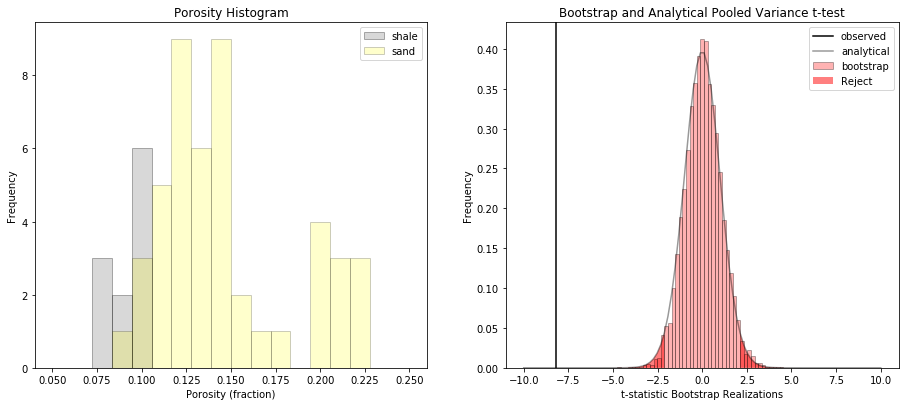

The p-value of the observed effect is 0.0


In [268]:
L = 10000                                                 # number of bootstrap realizations, $L$, to sample the t-statistic               
alpha = 0.05                                              # alpha level
correct_samples_equal_variance = True                     # True - correct sample variances, False - only correct the means

t_stat = np.zeros(L); p_value = np.zeros(L)               # make arrays to store the t-statistic, and p-value realizations
 
global_average = np.average(np.concatenate([por_sand,por_shale])) # shift the means to be equal to the globla mean
global_stdev = np.std(np.concatenate([por_sand,por_shale])) # shift the standard deviation to be equal to the globla standard deviation

por_sand_affine = (por_sand - np.average(por_sand))*global_stdev/np.std(por_sand) + global_average
por_shale_affine = (por_shale - np.average(por_shale))*global_stdev/np.std(por_shale) + global_average   
   
for l in range(0, L):                                     # loop over bootstrap realizations
    if correct_samples_equal_variance:
        por_shale_real = random.choices(por_shale_affine, weights=None, cum_weights=None, k=len(por_shale_s)) # bootstrap realization of shale porosity
        por_sand_real = random.choices(por_sand_affine, weights=None, cum_weights=None, k=len(por_sand_s)) # bootstrap realization of sand porosity
    else:
        por_shale_real = random.choices(por_shale_s, weights=None, cum_weights=None, k=len(por_shale_s)) # bootstrap realization of shale porosity
        por_sand_real = random.choices(por_sand_s, weights=None, cum_weights=None, k=len(por_sand_s)) # bootstrap realization of sand porosity
    
    t_stat[l], p_value[l] = ttest_ind(por_shale_real,por_sand_real,equal_var=True)

lower_bound = np.percentile(t_stat,alpha*0.5*100)
upper_bound = np.percentile(t_stat,(1-alpha*0.5)*100)

plt.subplot(121)                                          # original porosity histograms
plt.hist(df_shale['Porosity'],color = 'gray',alpha = 0.3,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)),label='shale')
plt.hist(df_sand['Porosity'],color = 'yellow',alpha = 0.2,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)),label='sand')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram')
plt.legend()

plt.subplot(122)                                          # bootstrap t-statistic distribution by bootstrap, analytical and observed t-statistic
plt.hist(t_stat,color = 'red',alpha = 0.3,edgecolor='black',bins=np.linspace(-10,10,100),density=True,label='bootstrap')
plt.axvline(x=t_stat_obs,c='black',label='observed')
plt.xlabel('t-statistic Bootstrap Realizations'); plt.ylabel('Frequency'); plt.title("Bootstrap and Analytical Pooled Variance t-test")

analytical = t.pdf(np.linspace(-10,10,100), len(df_sand)+len(df_shale)-2,loc=0,scale=1.0) # plot the analytically-derived sampling distribution
plt.plot(np.linspace(-10,10,100),analytical,color = 'black',alpha=0.4,label="analytical")
plt.fill_between(np.linspace(-10,10,100), 0, analytical, where = np.linspace(-10,10,100) <= lower_bound, facecolor='red', interpolate=True, alpha = 0.5,label = "Reject")
plt.fill_between(np.linspace(-10,10,100), 0, analytical, where = np.linspace(-10,10,100) >= upper_bound, facecolor='red', interpolate=True, alpha = 0.5)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()  

print('The p-value of the observed effect is ' + str(round((percentileofscore(t_stat,t_stat_obs))/100,10)))

#### Bootstrap F-test for Difference in Variances

Now let's try out the diffence in Variances,

\begin{equation}
H_0: \frac{\sigma^2_2}{\sigma^2_1} = 1.0
\end{equation}

where, $\sigma^2_2 > \sigma^2_1$.

The F-statistic bootstrap realizations are calculated as:

\begin{equation}
\hat{F}^{\ell} = \frac{{s^2}^{\ell}_2}{{s^2}^{\ell}_1}
\end{equation}

Once again we need to go an extra step, since the test assumes the variances are equal, to do this we pool all the data together and bootstrap resample for each new sample set the the approapriate number $n_{1}$ and $n_{2}$.

* if you would like to see for yourself, try changing the code below:

```python
correct_samples_equal_variance = True
```

to: 

```python
correct_samples_equal_variance = False
```

 and observe the mismatch between the analytical and bootstrap t-statistic distributions.

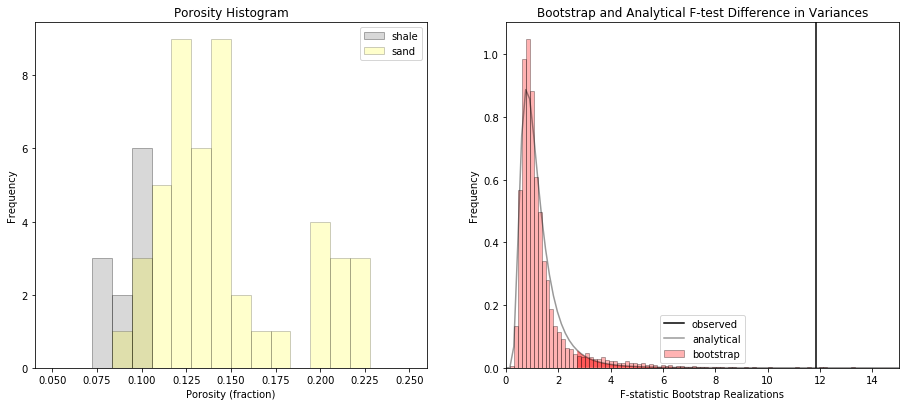

The p-value of the observed effect is 0.0015


In [266]:
L = 10000                                                 # number of bootstrap realizations, $L$, to sample the t-statistic               
alpha = 0.05                                              # alpha level
correct_samples_equal_variance = True                     # True - correct sample variances, False - only correct the means

if stats.pvariance(por_shale) > stats.pvariance(por_sand):
    F_stat_obs = stats.pvariance(por_shale)/stats.pvariance(por_sand)
    na = len(por_shale); nb = len(por_sand)
else:
    F_stat_obs = stats.pvariance(por_sand)/stats.pvariance(por_shale)
    na = len(por_sand); nb = len(por_shale)

F_stat = np.zeros(L)                                      # make arrays to store the t-statistic, and p-value realizations
    
for l in range(0, L):                                     # loop over bootstrap realizations
    por_shale_real = random.choices(np.concatenate([por_sand,por_shale]), weights=None, cum_weights=None, k=len(por_shale)) # bootstrap realization of shale porosity
    por_sand_real = random.choices(np.concatenate([por_sand,por_shale]), weights=None, cum_weights=None, k=len(por_sand)) # bootstrap realization of sand porosity
    
    if stats.variance(por_shale) > stats.variance(por_sand): # consistent with numerator and denominator selection
        F_stat[l] = stats.variance(por_shale_real)/stats.variance(por_sand_real) 
    else:
        F_stat[l] = stats.variance(por_sand_real)/stats.variance(por_shale_real)
            
lower_bound = np.percentile(F_stat,alpha*0.5*100)
upper_bound = np.percentile(F_stat,(1-alpha*0.5)*100)

plt.subplot(121)                                          # original porosity histograms
plt.hist(df_shale['Porosity'],color = 'gray',alpha = 0.3,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)),label='shale')
plt.hist(df_sand['Porosity'],color = 'yellow',alpha = 0.2,edgecolor='black',bins = np.linspace(pormin,pormax,int(len(df)/3)),label='sand')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram')
plt.legend()

plt.subplot(122)                                          # bootstrap t-statistic distribution by bootstrap, analytical and observed t-statistic
plt.hist(F_stat,color = 'red',alpha = 0.3,edgecolor='black',bins=np.linspace(0,15,100),density=True,label='bootstrap')
plt.axvline(x=F_stat_obs,c='black',label='observed')
plt.xlabel('F-statistic Bootstrap Realizations'); plt.ylabel('Frequency'); plt.title("Bootstrap and Analytical F-test Difference in Variances")
plt.xlim(0,15)

analytical = F.pdf(np.linspace(0,15,100),(na-1),(nb-1)) # plot the analytically-derived sampling distribution
plt.plot(np.linspace(0,15,100),analytical,color = 'black',alpha=0.4,label="analytical")
upper_bound = F.ppf(1-alpha, na-1, nb-1)

plt.fill_between(np.linspace(0,15,100), 0, analytical, where = np.linspace(0,15,100) >= upper_bound, facecolor='red', interpolate=True, alpha = 0.5)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show() 

print('The p-value of the observed effect is ' + str(round((100 - percentileofscore(F_stat,F_stat_obs))/100,5)))

#### Observations

Some observations:

* bootstrap can be applied to calculate the sampling distribution for a hypothesis test

* we can then calculate the p-value of the observed effect as the percentile of this sampling distribution
     
* we must set the sample data to honor the null hypothesis and any associated assumptions, e.g. equal variances

* we bootstrap the sampling statistic, t-statistic, as it is formulated given all hypothesis assumptions, this is the reason we don't just bootstrap the effect, the difference in means

#### Comments

This was a demonstration of bootstrap hypothesis testing for the significance in difference in means between 2 sample sets in Jupyter Notebook Python. 

I have many other demonstrations on data analytics and machine learning, e.g. on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
